In [1]:
cd

C:\Users\Diewertje


In [2]:
cd Documents\Year 3\BEP\Energy_Landscape_dCas9\Diewertje

C:\Users\Diewertje\Documents\Year 3\BEP\Energy_Landscape_dCas9\Diewertje


In [3]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);

In [4]:
# Load data
import Prepare_data_Simple as Pre
Cas9=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
Cas9
#Boyle=pd.read_csv('')

# prepare data
import Prepare_data_Simple as pre
xdata_cas9,ydata_cas9,yerr_cas9=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')

In [5]:
# Load best simulations Cas9 and Cas12
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
simCas9='../Diewertje/Simulation results/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt'
ParamCas9=getParm.load_simm_anneal(simCas9,Nparams)
simCas12='../Diewertje/Simulation results/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt'
ParamCas12=getParm.load_simm_anneal(simCas12,Nparams)
simBoyle='../data/22_3_2019/fit_22_3_2019_sim_9.txt'
ParamBoyle=plt_B.load_simm_anneal(simBoyle, 43)


# Figure 23B

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


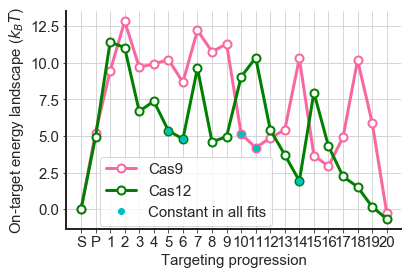

In [6]:
# plot landscapes both Cas
# --- (microscopic) free-energy landscape --- 
sims=[simCas9,simCas12]
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(sims,44,'general_energies_no_kPR')
#lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]

plt.plot(np.array(landscape.loc[simCas9]), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Cas9');

plt.plot(np.array(landscape.loc[simCas12]), color='green' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Cas12');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(landscape.loc[simCas9].index[2:]),  fontsize=15);
plt.plot([6,7,15,11,12],[landscape.loc[simCas12][6],landscape.loc[simCas12][7],
                         landscape.loc[simCas12][15],landscape.loc[simCas9][11],landscape.loc[simCas9][12]],
         color='c',marker='o',ls='',label='Constant in all fits')
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();
plt.legend(fontsize=15,loc=[0.1,0.015])


# Figure 23A

In [7]:
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):

    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    
    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()
    
    if Plot:
        single_mut_data_mean.plot(x='Position', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        plt.xlabel(Mut_name+' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical',fontsize=15)
    
    return single_mut_data_mean

def plot_double_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    Mut_type_str = Mut_type+'|'+Mut_type
    
    data['Mutation Type'].fillna('', inplace=True)
    double_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type_str)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    double_mut_data['Position'] = double_mut_data['Mutation ID'].apply(lambda x: '|'.join(map(lambda y: y.split(':')[1], x.split('|'))))
    double_mut_data_mean = double_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    double_mut_map = np.empty((Ng,Ng))
    double_mut_map[:] = np.nan
    for n in range(len(double_mut_data_mean)):
        pos = double_mut_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        double_mut_map[Positions[1],Positions[0]] = double_mut_data_mean['Delta ABA (kBT)'].iloc[n]
        
    if Plot:    
        plt.figure()
        sns.heatmap(double_mut_map, cmap='coolwarm',cbar=True,vmin=0,vmax=double_mut_data_mean['Delta ABA (kBT)'].max())
        plt.xlabel(Mut_name+' 1', fontsize=15)
        plt.ylabel(Mut_name+' 2', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    return double_mut_data_mean, double_mut_map

def make_block_ID(MM_pos_list):
    
    bi = MM_pos_list[0]
    bf = MM_pos_list[-1]
    block = np.arange(bi,bf+1)
    if (len(block)!=len(MM_pos_list)) or np.any(block!=np.array(MM_pos_list)):
        return ''
    return '|'.join(list(map(str, [bi, bf])))

def plot_block_mm_ABA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    for n in range(len(block_mm_data_mean)):
        pos = block_mm_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        block_mm_map[Positions[0],Positions[1]] = block_mm_data_mean['Delta ABA (kBT)'].iloc[n]

    if Plot:
        plt.figure()
        sns.heatmap(block_mm_map, cmap='coolwarm',cbar=True,vmin=2,vmax=5) #=block_mm_data_mean['Delta ABA (kBT)'].max())
        #plt.xlabel('Block end', fontsize=15)
        #plt.ylabel('Block start', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    block_start_mm_data = block_mm_data_mean.set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_block_mm_ABA_WA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position')
    ydata=[]
    yerr=[]
    pos=[]
    for blockID, group in block_mm_data_mean:
        yvals=[]
        yerval=[]
        for i in range(len(group)):
            yvals.append(group['Delta ABA (kBT)'].iloc[i])
            yerval.append(group['Uncertainty'].iloc[i])
        pos.append(group['Position'].iloc[i])
        ydata.append(yvals)
        yerr.append(yerval)

    wa=[]
    for i in range(len(pos)):
        y = np.array(ydata[i])
        e = np.array(yerr[i])
        wa.append(np.average(y, weights=e ** -2, axis=0))

    block_mm_data_mean=pd.DataFrame({'Position':pd.Series(pos),'Delta ABA (kBT)':pd.Series(wa)})
    
    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    
    block_start_mm_data = pd.DataFrame(block_mm_data_mean).set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_block_mm_ABA_WA_raw(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'ABA', 'error']].groupby('Position')
    ydata=[]
    yerr=[]
    pos=[]
    for blockID, group in block_mm_data_mean:
        yvals=[]
        yerval=[]
        for i in range(len(group)):
            yvals.append(group['Delta ABA (kBT)'].iloc[i])
            yerval.append(group['Uncertainty'].iloc[i])
        pos.append(group['Position'].iloc[i])
        ydata.append(yvals)
        yerr.append(yerval)

    wa=[]
    for i in range(len(pos)):
        y = np.array(ydata[i])
        e = np.array(yerr[i])
        wa.append(np.average(y, weights=e ** -2, axis=0))

    block_mm_data_mean=pd.DataFrame({'Position':pd.Series(pos),'Delta ABA (kBT)':pd.Series(wa)})
    
    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    
    block_start_mm_data = pd.DataFrame(block_mm_data_mean).set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data


def plot_mut_PAM_ABA(data, data_name='Finkelstein Data', Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    data['Alignment'].fillna('', inplace=True)
    NonCanonical = data[(data['Canonical']==False)&(data['Alignment']!='')&(data['Mutation Type']=='')][['PAM', 'Delta ABA (kBT)', 'Uncertainty']].groupby('PAM').mean()
    
    if Plot:
        bar_width = 0.35
        plt.figure(figsize=(20,6))
        plt.bar(np.arange(len(NonCanonical)), NonCanonical['Delta ABA (kBT)'], width=bar_width)
        ax = plt.gca()
        ax.set_xticks(np.arange(len(NonCanonical))+0.5*bar_width);
        ax.set_xticklabels(NonCanonical.index, rotation='vertical');
        #plt.xlabel('PAM', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
    
    return NonCanonical

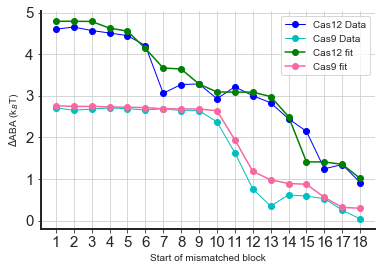

In [8]:
model_id='general_energies_no_kPR'
guide_length=20
concentrations9=np.array([0.1,0.3,10,30,100,300])
ontarget_ABA_12 = CalcABA.calc_ABA(ParamCas12, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
energy_block12=[]
epsilon = ParamCas12[:-2]
energy_block12_eq=[]
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies=CalcABA.get_energies(epsilon,block, guide_length)
    energy_block12_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies))))-ontarget_ABA_12)  
    energy_block12.append(CalcABA.calc_delta_ABA(ParamCas12,concentrations,1,block,ontarget_ABA_12,model_id=model_id,guide_length=guide_length,T=10*60))

ontarget_ABA_9 = CalcABA.calc_ABA(ParamCas9, concentrations9, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
energy_block9=[]
energy_block9_eq=[]
epsilon9 = ParamCas9[:-2]
#epsilon9[0]=3.5
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies9=CalcABA.get_energies(epsilon9,block, guide_length)
    energy_block9_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies9))))-ontarget_ABA_9) 
    energy_block9.append(CalcABA.calc_delta_ABA(ParamCas9,concentrations9,1,block,ontarget_ABA_9,model_id=model_id,guide_length=guide_length,T=10*60))


Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
data_cas12a_d1 = pd.read_csv(Path+filename_3)
_, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
_, block_cas12a_d_WA, block_start_cas12_d2_WA = plot_block_mm_ABA_WA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
plt.plot(block_start_cas12_d2_WA['Block start'], block_start_cas12_d2_WA['Delta ABA (kBT)'], marker='o', linewidth=1, color='blue',label='Cas12 Data') 


Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_1 = 'cas9-target-e-replicate-1-delta-abas-processed.csv'
data_cas9_e1 = pd.read_csv(Path+filename_1)
_, block_cas9_e1, block_start_cas9_e1 = plot_block_mm_ABA(data_cas9_e1, data_name='Cas 9 - target e', Canonical=True, Plot=False)
plt.plot(block_start_cas9_e1['Block start'], block_start_cas9_e1['Delta ABA (kBT)'], marker='o', linewidth=1, color='c',label='Cas9 Data') 


plt.plot(range(1,19),energy_block12[:-2],marker='o',label='Cas12 fit',color='green')
plt.plot(range(1,19),energy_block9[:-2],marker='o',label='Cas9 fit',color='#f768a1')
#plt.plot(range(1,19),energy_block9_eq[:-2],marker='o',label='Cas9 fit eq',color='blue')

plt.ylabel('$\Delta$ABA (k$_B$T)')
plt.xlabel('Start of mismatched block')
plt.xticks(range(1,19))
plt.legend()
plt.grid()
sns.despine();

# Cas 12 is target e
# Cas 9 is target d

# Figure 17

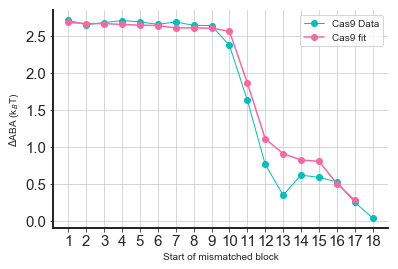

In [9]:
model_id='general_energies_no_kPR'
concentrations=np.array([1,30,100])
guide_length=20
# ontarget_ABA_12 = CalcABA.calc_ABA(ParamCas12, concentrations, reference=1,
#                                     mismatch_positions=[],
#                                     model_id=model_id,
#                                     guide_length=20,
#                                     T=60 * 10)
# energy_block12=[]
# epsilon = ParamCas12[:-2]
# energy_block12_eq=[]
# for mmStart in range(1,21):
#     block=np.arange(mmStart,21)
#     energies=CalcABA.get_energies(epsilon,block, guide_length)
#     energy_block12_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies))))-ontarget_ABA_12)  
#     energy_block12.append(CalcABA.calc_delta_ABA(ParamCas12,concentrations,1,block,ontarget_ABA_12,model_id=model_id,guide_length=guide_length,T=10*60))

concentrations9=np.array([0.1,0.3,1,3,10,30,100,300])
ontarget_ABA_9 = CalcABA.calc_ABA(ParamCas9, concentrations9, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
energy_block9=[]
energy_block9_eq=[]
epsilon9 = ParamCas9[:-2]
#epsilon9[0]=3.5
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies9=CalcABA.get_energies(epsilon9,block, guide_length)
    energy_block9_eq.append(-np.log(np.sum(np.exp(-np.cumsum(energies9))))-ontarget_ABA_9) 
    energy_block9.append(CalcABA.calc_delta_ABA(ParamCas9,concentrations9,1,block,ontarget_ABA_9,model_id=model_id,guide_length=guide_length,T=10*60))


# Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
# filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
# data_cas12a_d1 = pd.read_csv(Path+filename_3)
# _, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
# _, block_cas12a_d_WA, block_start_cas12_d2_WA = plot_block_mm_ABA_WA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
# plt.plot(block_start_cas12_d2_WA['Block start'], block_start_cas12_d2_WA['Delta ABA (kBT)'], marker='o', linewidth=1, color='blue',label='Cas12 Data') 


Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_1 = 'cas9-target-e-replicate-1-delta-abas-processed.csv'
data_cas9_e1 = pd.read_csv(Path+filename_1)
_, block_cas9_e1, block_start_cas9_e1 = plot_block_mm_ABA(data_cas9_e1, data_name='Cas 9 - target e', Canonical=True, Plot=False)
plt.plot(block_start_cas9_e1['Block start'], block_start_cas9_e1['Delta ABA (kBT)'], marker='o', linewidth=1, color='c',label='Cas9 Data') 


# plt.plot(range(1,19),energy_block12[:-2],marker='o',label='Cas12 fit',color='green')
plt.plot(range(1,18),energy_block9[:-3],marker='o',label='Cas9 fit',color='#f768a1')
#plt.plot(range(1,19),energy_block9_eq[:-2],marker='o',label='Cas9 fit eq',color='blue')

plt.ylabel('$\Delta$ABA (k$_B$T)')
plt.xlabel('Start of mismatched block')
plt.xticks(range(1,19))
plt.legend()
plt.grid()
sns.despine();

# Cas 12 is target e
# Cas 9 is target d

# Figure 25b

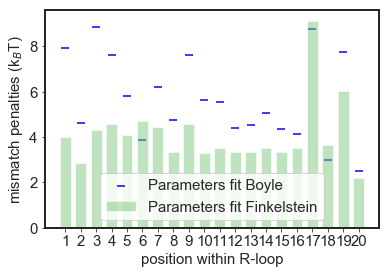

In [10]:
width=0.7
ind= np.arange(1,len(ParamCas9)-1-21)
import seaborn

plt.bar(ind,ParamCas9[21:-2],width,label='Parameters fit Finkelstein',alpha=0.5)
plt.scatter(ind,ParamBoyle[21:-2],s=50,marker='_',color='blue',label='Parameters fit Boyle')
plt.ylabel('mismatch penalties (k$_B$T)',fontsize=15)
plt.xlabel('position within R-loop',fontsize=15)
#plt.title('The mismatch penalties ($\epsilon_C$)',fontsize=15)
plt.xticks(ind)
plt.legend(fontsize=15,loc=8)

# Figure 18a

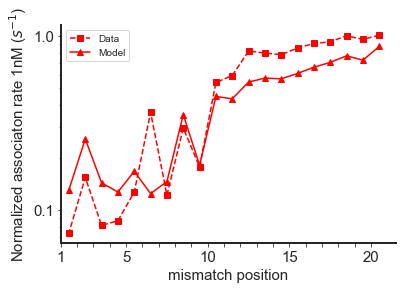

In [11]:
import Boyle_data_processing as Bdata
import plotting_Boyle_Diewertje as plt_B
fldr_Boyle_data = '../Data_Boyle/Weighted_Avarage/'

dataOTonR=2.888400000000000060e-04
Pbound_OT,modelOTonR,_=plt_B.calc_Boyle(CalcOccupancy=True,CalcOffRate=False,
                            CalcOnRate=True, parameters=ParamCas9,
                            mismatch_positions=[],model_id=model_id)
modelOTonR

Pb_pred,on_pred,off_pred=plt_B.calc_predictions(ParamCas9,model_id)
on_pred=on_pred/modelOTonR

model,data=plt_B.plot_single_mismatches(on_pred,'OnRate',fldr_Boyle_data,False,None)
positions = 20 - np.arange(0,20)
plt.semilogy(positions, data/dataOTonR, linestyle='dashed', marker='s', color='red',label='Data')
plt.plot(positions, model, linestyle='solid', marker='^', color='red', label='Model')
ax=plt.gca()
ylabel = r'Normalized associaton rate 1nM ($s^{-1}$)'



positions = 20 - np.arange(0,20)
ax.set_xlim(1, 21)
ax.set_xlabel('mismatch position', fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)
ax.set_xticks([i + 0.5 for i in range(20)])
ax.set_xticklabels([1, '', '', '', 5, '', '', '', '', 10, '', '', '', '', 15, '', '', '', '', 20],
                   rotation=0,
                   fontsize=15);
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.legend(loc='best', fontsize=12, frameon=True)
sns.despine(ax=ax)
ax=plt.gca()
plt.legend()


# Figure 18b

Text(29.0, 0.5, 'mismatch 2')

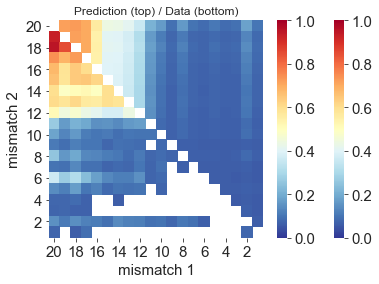

In [12]:
Dmodel,Ddata=plt_B.plot_heatmap(on_pred,'OnRate',fldr_Boyle_data,False,None,True)
colormap = 'RdYlBu_r' #'Reds'
ax=plt.gca()
sns.heatmap(Ddata/dataOTonR, cmap=colormap, mask=np.triu(Ddata/dataOTonR),vmin=0,vmax=1);
sns.heatmap(Dmodel, cmap=colormap, mask=np.tril(Dmodel),vmin=0,vmax=1); # already devided by ontarget in on_pred
# ax.set_yticklabels(map(lambda x: str(int(20-x)), ax.get_yticks() - 0.5));
# ax.set_xticklabels(map(lambda x: str(int(x+1)), ax.get_xticks() - 0.5));
ax.set_xticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.title('Prediction (top) / Data (bottom)')

ax.set_xlabel('mismatch 1', fontsize=15)
ax.set_ylabel('mismatch 2', fontsize=15)

# Figure 18c

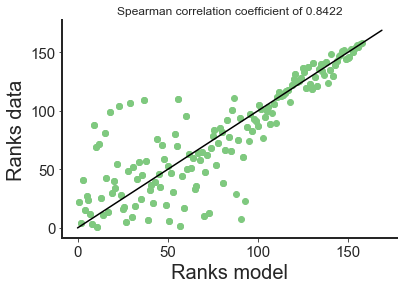

In [13]:
reshaped_Dmodel=Dmodel.reshape(400)
reshaped_Ddata=Ddata.reshape(400)
reshaped_Dmodel=reshaped_Dmodel[~np.isnan(reshaped_Ddata)]
reshaped_Ddata=reshaped_Ddata[~np.isnan(reshaped_Ddata)]
from scipy import stats
rank_model=stats.rankdata(reshaped_Dmodel,method='dense')
rank_data=stats.rankdata(reshaped_Ddata,method='dense')
plt.scatter(rank_model,rank_data)
plt.xlabel('Ranks model',fontsize=20)
plt.ylabel('Ranks data',fontsize=20)
plt.plot(range(170),color='black')

spearman_corr = np.corrcoef(rank_data,rank_model)[0,1]
spearman_corr
plt.title('Spearman correlation coefficient of 0.8422')
sns.despine();

# Figure 7a

C:\Users\Diewertje\Python\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


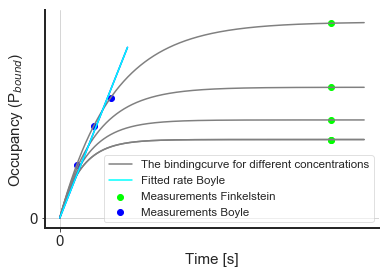

In [14]:
t=np.arange(0,9000,10)
t_b=np.array([500,1000,1500])
t_f=8000
order=10**-3.5
corr=0.1 #0.1
k_array=[2,3,4,5]
colPlot='gray'
colF='lime'
colMB='blue'
colFB='cyan'

for k in k_array:
    a=(1-np.exp(-k*order*t))*1/(k*corr)
    f=(1-np.exp(-k*order*t_f))*1/(k*corr)
    plt.plot(t,a,color=colPlot)
    plt.scatter(t_f,f,color=colF)
plt.scatter(t_f,f,color=colF, label='Measurements Finkelstein')
plt.plot(t,a,color=colPlot,label='The bindingcurve for different concentrations')
for k in [k_array[0]]:
    b=(1-np.exp(-k*order*t_b))*1/(k*corr)
    plt.scatter(t_b,b,color=colMB,label='Measurements Boyle')
    rateBoyle,_,_,_=np.linalg.lstsq(t_b[:,np.newaxis],b)
    plt.plot([0]+t_b.tolist()+[2000],rateBoyle*np.array([0]+t_b.tolist()+[2000]),'b')
plt.plot([0]+t_b.tolist()+[2000],rateBoyle*np.array([0]+t_b.tolist()+[2000]),colFB,label='Fitted rate Boyle')
plt.yticks([0]) 
plt.xticks([0])
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()
plt.legend(fancybox=True,framealpha=0.6,fontsize=11.5)

# Figure 7b

C:\Users\Diewertje\Python\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


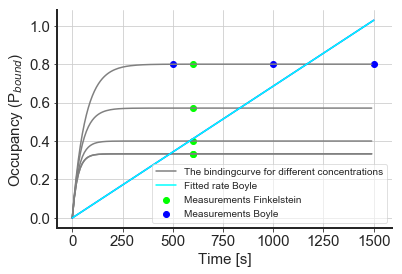

In [15]:
t=np.arange(0,1500,10)
t_b=np.array([500,1000,1500])
t_f=600
order=10**-3.5
corr=0.025 #0.1
k_array=[50,70,100,120]
#mycmap = cm.get_cmap('Accent')
colPlot='gray'
colF='lime'
colMB='blue'
colFB='cyan'
for k in k_array:
    a=(1-np.exp(-k*order*t))*1/(k*corr)
    f=(1-np.exp(-k*order*t_f))*1/(k*corr)
    plt.plot(t,a,color=colPlot)
    plt.scatter(t_f,f,color=colF)
plt.scatter(t_f,f,color=colF, label='Measurements Finkelstein')
plt.plot(t,a,color=colPlot,label='The bindingcurve for different concentrations')
for k in [k_array[0]]:
    b=(1-np.exp(-k*order*t_b))*1/(k*corr)
    plt.scatter(t_b,b,color=colMB,label='Measurements Boyle')
    rateBoyle,_,_,_=np.linalg.lstsq(t_b[:,np.newaxis],b)
    plt.plot([0]+t_b.tolist()+[1500],rateBoyle*np.array([0]+t_b.tolist()+[1500]),'b')
plt.plot([0]+t_b.tolist()+[1500],rateBoyle*np.array([0]+t_b.tolist()+[1500]),colFB,label='Fitted rate Boyle')
#plt.yticks([0]) 
#plt.xticks([0])
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()
plt.legend(fancybox=True,framealpha=0.6,fontsize=10,loc=4)

# Load all simulations Cas9, this is needed for the following figures

In [16]:
# Load all simulations Cas9
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,25):
    sa = pd.read_csv('../Diewertje/Simulation results/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/Simulation results/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/Simulation results/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt'

In [17]:
# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


# Figure 6

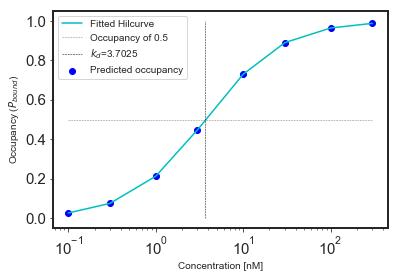

In [18]:
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_with_concentrations.csv')

def Hill_eq(C, Kd):
    return (1.0+Kd/C)**(-1)

paramBoyle=np.loadtxt('../Diewertje/parameters_Boyle.txt')
full_conc=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])
ref=1
mismatch_positions=xdata
model_id='init_limit_general_energies_v2'
guide_length=20
T=10*60

amount=(len(xdata))

Kd_full=[]
Pfull=[]
for i in range(0,amount):
    x,y,_=CalcABA.calc_Pbound(paramBoyle,full_conc,ref,mismatch_positions[i],model_id,guide_length,T )
    Kd_full.append(x)
    Pfull.append(y)
    
Kd_full=np.array(Kd_full)
Pfull=np.array(Pfull)

strand=0 # 150 or 0 is almost perfect, 50 is less perfect

i=0
concentrations_f =[0.1,0.3, 1, 3, 10, 30, 100, 300] # in nanoMolair
Pbnd=[0.0,
rawABA['0.3nM'].iloc[i],
rawABA['1nM'].iloc[i],
rawABA['3nM'].iloc[i],
rawABA['10nM'].iloc[i],
rawABA['30nM'].iloc[i],
rawABA['100nM'].iloc[i],
rawABA['300nM'].iloc[i]]
#plt.scatter(concentrations_f,Pbnd, color='g',label='Data')
#plt.legend()
#plt.xscale('log')

C=np.linspace(1,30,100)
Pf=Hill_eq(concentrations_f,Kd_full[0])
plt.plot(concentrations_f,Pf,color='c',label='Fitted Hilcurve')
plt.scatter(concentrations_f,Pf,color='b',label='Predicted occupancy')
plt.plot(concentrations_f,np.ones(len(concentrations_f))*0.5,linewidth=0.5,color='gray',linestyle='--',label='Occupancy of 0.5')
plt.plot(Kd_full[0]*np.ones(10),np.linspace(0,1,10),linewidth=0.5,color='black',linestyle='--',label='$k_d$=3.7025')
#plt.title('How to fit the $k_d$?')
plt.ylabel('Occupancy ($P_{bound}$)')
plt.xlabel('Concentration [nM]')
plt.legend()
plt.xscale('log')


# Figure 11a

In [19]:
#------------To plot weighted average--------
import os
import numpy as np
import pandas as pd
#import Boyle_data_processing as process
#import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data_Simple as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction

percentage=0.1,
model_id='general_energies_no_kPR'
path='../Data_ABA_Finkelsteinlab/'
replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'

WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']-2.5545002878227865 
# substract ontarget to go to delta ABA


ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]


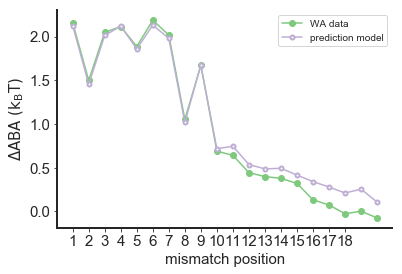

In [20]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    #concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    concentrations = np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
    print('ontarget ABA is:',ontarget_ABA)
    
    #concentrations = np.array([1,30,100])
    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                        mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)
    print(delta_ABA)
    
    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='less concentration points')

#         sns.despine()
#         plt.xticks(range(1, 19), fontsize=15);
#         plt.yticks(fontsize=15);
#         plt.xlabel('mismatch position', fontsize=15);
#         plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    return delta_ABA



WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA data')
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
#_ = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plt.legend()

# Figure 11b

Text(29.0, 0.5, 'Mismatch 2')

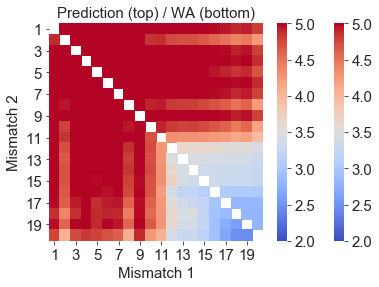

In [21]:
# with less concentration points
def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations = np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=2, vmax=5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.xlabel('Mismatch 1', fontsize=15)
plt.ylabel('Mismatch 2', fontsize=15)

# Figure 12a & 14b (same figure)

In [22]:
# select based on dataset instead of best fit:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset3,
                                                                        percentage=0.018,
                                                                        model_id='general_energies_no_kPR',
                                                                        path='../Data_ABA_Finkelsteinlab/',
                                                                        replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
# replica is filename of the data in my case!

# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    5.237439
1     -4.181529
2     -3.408062
3      3.127116
4     -0.211355
5     -0.303034
6      1.540037
7     -3.533614
8      1.456277
9     -0.533073
10     6.141990
11     0.936271
12    -0.656390
13    -0.567080
14    -4.867717
15     6.627549
16     0.731001
17    -1.974013
18    -5.258456
19     4.251418
20     6.151085
Name: ../Diewertje/Simulation results/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


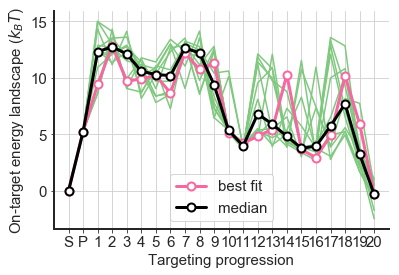

In [23]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Figure 15b

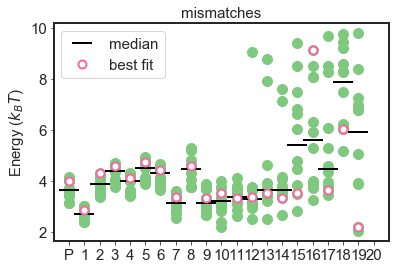

In [24]:
# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# Figure 13b

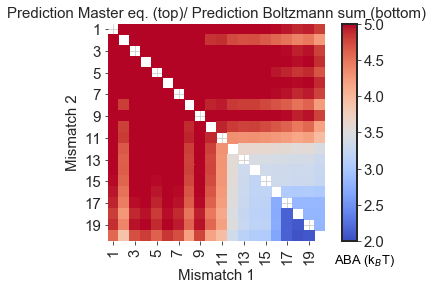

In [25]:
def predict_double_mm_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=2, vmax=5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'ABA (k$_B$T)',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        #cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=10);

        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction Master eq. (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat, str_title

def predict_double_mm_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv',
                      str_title='..'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            energies_simple=CalcABA.get_energies(epsilon,[first_mm,second_mm], guide_length)
            delta_ABA_mat[first_mm - 1, second_mm - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
    
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.triu(delta_ABA_mat),vmin=2, vmax=5,square=True,cbar=False)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title += '/ Prediction Boltzmann sum (bottom)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

ABAnorm=[]
ABAeq=[]
epsilon=Param_conc3[:-2]
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5

for i in range(len(xdata)):
    ABAnorm.append(CalcABA.calc_ABA(Param_conc3,concentrations,1,xdata[i],model_id))
    energies=CalcABA.get_energies(epsilon,xdata[i], guide_length=20)
    ABAeq.append(-np.log(np.sum(np.exp(-np.cumsum(energies)))))
    

z,str_title = predict_double_mm_normal(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
normdoublemm = predict_double_mm_eq(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA,str_title=str_title)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);




# Figure 13a

-0.32710210940874657
ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]


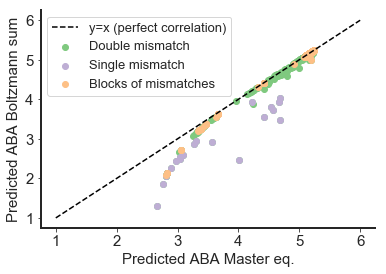

In [26]:
ABA_simple=[]
epsilon = Param_conc3[:-2]
for mm_pos in range(1, guide_length + 1):
    energies_simple=CalcABA.get_energies(epsilon,[mm_pos], guide_length)
    ABA_simple.append(-np.log(np.sum(np.exp(-np.cumsum(energies_simple)))))
ABA_simple

ABA_simple_on=-np.log(np.sum(np.exp(-np.cumsum(CalcABA.get_energies(epsilon,[],guide_length)))))
print(ABA_simple_on)
ABA_simple_delta=ABA_simple-ABA_simple_on
ABA_simple_delta

normalSingle = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)

def predict_block_mismatches_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                             data_file = '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    delta_ABA_mat[:] = np.nan

    for start_of_block in range(1, guide_length + 1):
        for end_of_block in range(start_of_block + 2, guide_length + 1):
            mm_block = list(range(start_of_block, end_of_block)) # Python 3! for python 2, remove the list around it!
            energies_simple=CalcABA.get_energies(epsilon,mm_block, guide_length)
            delta_ABA_mat[start_of_block - 1, end_of_block - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
            

    return delta_ABA_mat

def predict_block_mismatches_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                             data_file = '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    delta_ABA_mat = np.zeros((guide_length, guide_length))
    delta_ABA_mat[:] = np.nan

    for start_of_block in range(1, guide_length + 1):
        for end_of_block in range(start_of_block + 2, guide_length + 1):
            mm_block = list(range(start_of_block, end_of_block)) # Python 3! for python 2, remove the list around it!
            delta_ABA_mat[start_of_block - 1, end_of_block - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                         reference_conc,
                                                                                         mismatch_positions=mm_block,
                                                                                         model_id=model_id,
                                                                                         guide_length=guide_length,
                                                                                         T=T)

    return delta_ABA_mat

blocks_eq = predict_block_mismatches_eq(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)




blocks_normal = predict_block_mismatches_normal(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)


plt.scatter(ABAnorm,ABAeq,label='Double mismatch')
plt.scatter(normalSingle+2.5545002878227865,ABA_simple,label='Single mismatch')
plt.scatter(blocks_normal,blocks_eq,label='Blocks of mismatches')
#+2.5545002878227865   OR +1.2599085983218907
x = np.linspace(1,6,1000);
plt.plot(x,x, linestyle='dashed', color='black', label='y=x (perfect correlation)')
plt.legend(fontsize=13, frameon=True, loc='upper left')
plt.xlabel('Predicted ABA Master eq.',fontsize=15);
plt.ylabel('Predicted ABA Boltzmann sum',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
sns.despine();

# Figure 13d

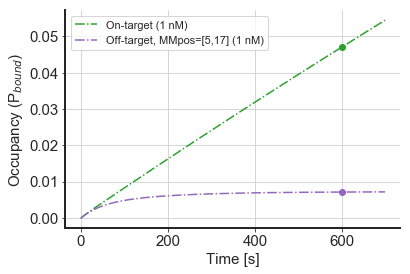

In [27]:
initial_condition=np.array([1.0] + [0.0] * (guide_length + 1))
rate_matrix_ot=CalcABA.get_master_equation(Param_conc3,[],model_id,20)
rate_matrix_of=CalcABA.get_master_equation(Param_conc3,[5,17],model_id,20)

concentration=[1]#[0.1,0.3,1,3,10,30,100,300]
Pot=[]
Pof=[]
for t in range(0,700):
    for c in concentration:
        new_rate_matrix = rate_matrix_ot.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pot.append(np.sum(Probability[1:]))
        
        new_rate_matrix = rate_matrix_of.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pof.append(np.sum(Probability[1:]))

Pot[1:]=Pot[1:]-Pot[1]
Pof[1:]=Pof[1:]-Pof[1]
plt.plot(range(0,700),Pot,label='On-target (1 nM)',linestyle='-.',color=current_colors[2])
plt.plot(range(0,700),Pof,label='Off-target, MMpos=[5,17] (1 nM)',linestyle='-.',color=current_colors[4])
plt.scatter(600,Pot[600],color=current_colors[2])
plt.scatter(600,Pof[600],color=current_colors[4])
###
plt.legend(fontsize=11)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()

# Figure 13c

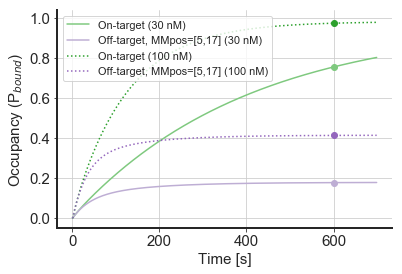

In [28]:
initial_condition=np.array([1.0] + [0.0] * (guide_length + 1))
rate_matrix_ot=CalcABA.get_master_equation(Param_conc3,[],model_id,20)
rate_matrix_of=CalcABA.get_master_equation(Param_conc3,[5,17],model_id,20)
concentration=[30]#[0.1,0.3,1,3,10,30,100,300]

Pot=[]
Pof=[]
for t in range(0,700):
    for c in concentration:
        new_rate_matrix = rate_matrix_ot.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pot.append(np.sum(Probability[1:]))
      
        new_rate_matrix = rate_matrix_of.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pof.append(np.sum(Probability[1:]))

Pot[1:]=Pot[1:]-Pot[1]
Pof[1:]=Pof[1:]-Pof[1]
plt.plot(range(0,700),Pot,label='On-target (30 nM)')
plt.plot(range(0,700),Pof,label='Off-target, MMpos=[5,17] (30 nM)')
plt.scatter(600,Pot[600])
plt.scatter(600,Pof[600])
#######
concentration=[100]#[0.1,0.3,1,3,10,30,100,300]
Pot=[]
Pof=[]
for t in range(0,700):
    for c in concentration:
        new_rate_matrix = rate_matrix_ot.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pot.append(np.sum(Probability[1:]))
     
        new_rate_matrix = rate_matrix_of.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pof.append(np.sum(Probability[1:]))

Pot[1:]=Pot[1:]-Pot[1]
Pof[1:]=Pof[1:]-Pof[1]
plt.plot(range(0,700),Pot,label='On-target (100 nM)',linestyle=':',color=current_colors[2])
plt.plot(range(0,700),Pof,label='Off-target, MMpos=[5,17] (100 nM)',linestyle=':',color=current_colors[4])
plt.scatter(600,Pot[600],color=current_colors[2])
plt.scatter(600,Pof[600],color=current_colors[4])
Pot=[]
Pof=[]
for t in range(0,700):
    for c in concentration:
        new_rate_matrix = rate_matrix_ot.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pot.append(np.sum(Probability[1:]))
        
        new_rate_matrix = rate_matrix_of.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pof.append(np.sum(Probability[1:]))

plt.legend(fontsize=11)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()

# Load all simulations Cas9 equilibrium, this is needed for the following figures

In [29]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,25):
    sa = pd.read_csv('../Diewertje/Simulation results/15_5_2019_var_rates_conc3_eq/fit_15_5_2019_var_rates_conc3_eq_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/Simulation results/15_5_2019_var_rates_conc3_eq/fit_15_5_2019_var_rates_conc3_eq_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/Simulation results/15_5_2019_var_rates_conc3_eq/fit_15_5_2019_var_rates_conc3_eq_sim_3.txt'

In [30]:
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

# Figure 11b

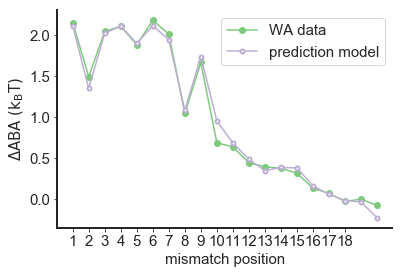

In [31]:
ABA_simple=[]
epsilon = Param_conc3[:-2]
for mm_pos in range(1, guide_length + 1):
    energies_simple=CalcABA.get_energies(epsilon,[mm_pos], guide_length)
    ABA_simple.append(-np.log(np.sum(np.exp(-np.cumsum(energies_simple)))))
ABA_simple_on=-np.log(np.sum(np.exp(-np.cumsum(CalcABA.get_energies(epsilon,[],guide_length)))))
ABA_simple_delta=ABA_simple-ABA_simple_on

WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA data')
plt.plot(range(1,21),np.array(ABA_simple)-2.5545002878227865,marker='o',markersize=4,markerfacecolor='white',markeredgewidth=2,linestyle='solid',label='prediction model')
plt.xticks(range(1, 19), fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('mismatch position', fontsize=15);
plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
plt.legend(fontsize=15, loc='best')
sns.despine()

# Figure 11d

Text(29.0, 0.5, 'Mismatch 2')

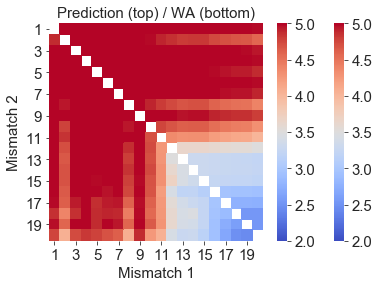

In [32]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

    
def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    ABA_simple = np.zeros((guide_length, guide_length))
    epsilon = parameters[:-2]
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            ABA_simple[first_mm - 1, second_mm - 1] = -np.log(np.sum(np.exp(-np.cumsum(CalcABA.get_energies(epsilon,[first_mm,second_mm], guide_length)))))
            
        # this should be calc_delta_ABA if we do not work wit rawABA dataset

    if show_plot:
        axHeatmap = sns.heatmap(ABA_simple, cmap='coolwarm', mask=np.tril(ABA_simple),vmin=2, vmax=5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='ABA', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return ABA_simple
    
import seaborn as sns
plt.figure()
best_heatmap =predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)
ax=plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.xlabel('Mismatch 1', fontsize=15)
plt.ylabel('Mismatch 2', fontsize=15)


# Figure 12b

In [33]:
def select_on_prediction_WA(simset,
                            percentage=0.1,
                            Nparams=43,
                            model_id='general_energies_no_kPR',
                            path='../Data_Boyle/',
                            replica='1'):
    # in my case replica is filename!
    scores = []
    for sim in simset:
        #print sim
        parameters = getParm.load_simm_anneal(sim, Nparams)
        score, _, _ = predict_train(parameters, model_id=model_id, path=path, replica=replica, Plot=False)
        scores.append(score)
    scores = np.array(scores)
    simset = np.array(simset)
    selected_scores = scores[scores <= percentage]
    selected_sims = simset[scores <= percentage]
    return selected_sims, selected_scores, scores

def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    
    ABA_simple=[]
    epsilon = parameters[:-2]
    for mm_pos in prediction['MM_pos']:
        energies_simple=CalcABA.get_energies(epsilon,[mm_pos], guide_length)
        ABA_simple.append(-np.log(np.sum(np.exp(-np.cumsum(energies_simple)))))
    ABA_simple
    
    prediction['WA_model']=ABA_simple
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction



# select based on dataset instead of best fit:
selected_sims, selected_scores, scores = select_on_prediction_WA(simset3,
                                                                percentage=0.022,
                                                                model_id='general_energies_no_kPR',
                                                                path='../Data_ABA_Finkelsteinlab/',
                                                                replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
# replica is filename of the data in my case!
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]


PAM    5.176044
1     -9.384326
2     -5.764141
3     -5.557904
4      8.121149
5     -4.524694
6     -3.163827
7      4.163410
8      0.926796
9      8.003526
10     6.488674
11     1.654590
12    -0.207306
13    -6.842964
14     5.012060
15     1.958556
16    -0.232552
17     0.409232
18    -8.056285
19     8.227962
20     2.317167
Name: ../Diewertje/Simulation results/15_5_2019_var_rates_conc3_eq/fit_15_5_2019_var_rates_conc3_eq_sim_3.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


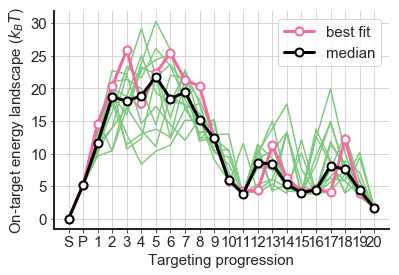

In [34]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Load data Cas12

In [35]:
# Load data
import Prepare_data as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
rawABA

cas9=pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
x,_,_=Pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')

# prepare data
path_to_data= '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename= 'cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'
xdata,ydata,yerr=Pre.Prepare_Cdata(path_to_data,filename) 


# Load all simulations Cas12 fitted on WA, this is needed for the following figures

In [36]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,16):
    sa = pd.read_csv('../Diewertje/Simulation results/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/Simulation results/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/Simulation results/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt'

In [37]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

model_id='general_energies_no_kPR'

# Figure 20a

-1.1978629362406041
ontarget ABA is: 0.030807444017204866
[4.19762488 4.51358768 4.00002884 4.60021333 4.58257519 4.18042828
 3.50078206 1.78420267 1.92570927 1.74534099 1.98648306 2.95884287
 3.08767754 2.01967387 1.49965574 1.38252248 1.43534838 1.08484015
 0.67955485 0.21010875]


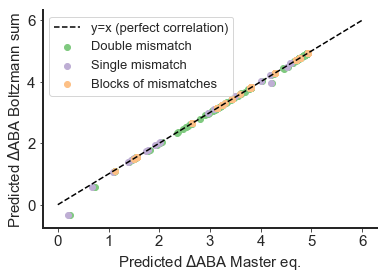

In [38]:
ABAnorm=[]
ABAeq=[]
epsilon=Param_conc3[:-2]
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5

ABA_simple=[]
epsilon = Param_conc3[:-2]
for mm_pos in range(1, guide_length + 1):
    energies_simple=CalcABA.get_energies(epsilon,[mm_pos], guide_length)
    ABA_simple.append(-np.log(np.sum(np.exp(-np.cumsum(energies_simple)))))
ABA_simple

ABA_simple_on=-np.log(np.sum(np.exp(-np.cumsum(CalcABA.get_energies(epsilon,[],guide_length)))))
print(ABA_simple_on)
ABA_simple_delta=ABA_simple-ABA_simple_on
ABA_simple_delta

normalSingle = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)

blocks_eq = predict_block_mismatches_eq(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)

blocks_normal = predict_block_mismatches_normal(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)


for i in range(len(xdata)):
    ABAnorm.append(CalcABA.calc_ABA(Param_conc3,concentrations,1,xdata[i],model_id))
    energies=CalcABA.get_energies(epsilon,xdata[i], guide_length=20)
    ABAeq.append(-np.log(np.sum(np.exp(-np.cumsum(energies)))))


plt.scatter(ABAnorm,ABAeq,label='Double mismatch')
plt.scatter(normalSingle,ABA_simple,label='Single mismatch')
plt.scatter(blocks_normal,blocks_eq,label='Blocks of mismatches')
#+2.5545002878227865
x = np.linspace(0,6,1000);
plt.plot(x,x, linestyle='dashed', color='black', label='y=x (perfect correlation)')
plt.legend(fontsize=13, frameon=True, loc='upper left')
plt.xlabel('Predicted $\Delta$ABA Master eq.',fontsize=15);
plt.ylabel('Predicted $\Delta$ABA Boltzmann sum',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
sns.despine();



# Figure 20b

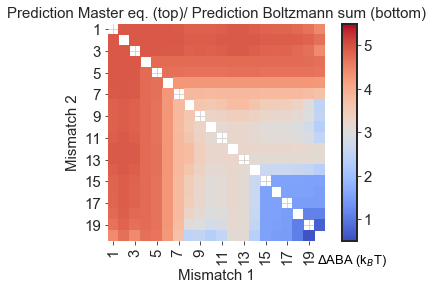

In [39]:
def predict_double_mm_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'$\Delta$ABA (k$_B$T)',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        #cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=10);

        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction Master eq. (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat, str_title

def predict_double_mm_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv',
                      str_title='..'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            energies_simple=CalcABA.get_energies(epsilon,[first_mm,second_mm], guide_length)
            delta_ABA_mat[first_mm - 1, second_mm - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
    
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.triu(delta_ABA_mat),vmin=0.5, vmax=5.5,square=True,cbar=False)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title += '/ Prediction Boltzmann sum (bottom)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

z,str_title = predict_double_mm_normal(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
normdoublemm = predict_double_mm_eq(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA,str_title=str_title)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);




# Figure 22

In [40]:
def process_SA_fits(simset,Nparams=44, model_id='init_limit_general_energies_v2'):
    '''
    Load the desired fits and store into dataframes:
    1. the value of epsilon_C at every position
    2. the value of epsilon_I at every position
    3. the value of the energy_landscape at every position
    4. the bound free-energy for the on-target at every position
    5. the estimated on-rate for the on-target. Both with and without assuming the solution and PAM have equillibrated

    :param simset:     Let every entry from simset be a filename including path

    :return: 6 separate pandas dataframes
    '''


    # prepare some stuff for the data frames:
    column_names = ['sim', 'PAM']
    for n in range(1, 21):
        column_names.append(str(n))

    match_rows = []
    mismatch_rows = []
    rates_rows = []
    landscape_rows = []
    FreeEnergy_rows = []
    fast_Rloop_rows = []

    for filename in simset:
        parameters = gpf.load_simm_anneal(filename, Nparams)
        parameters[0]=3.5 # If we want to fix epsilon PAM
        epsilon, fwd_rates = unpack_parameters(parameters, model_id)
        Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters, model_id,
                                                                                       show_plot=False);

        match_data = {}
        match_data['sim'] = filename
        for i, key in enumerate(column_names[1:]):
            match_data[key] = epsilon[i]
        match_rows.append(match_data)

        mismatch_data = {}
        mismatch_data['sim'] = filename
        for i, key in enumerate(column_names[2:]):
            mismatch_data[key] = epsilon[21 + i]
        mismatch_rows.append(mismatch_data)

        rates_data = {}
        rates_data['sim'] = filename
        rates_data['R1_to_PAM'] = fwd_rates[1] * np.exp(-epsilon[1])
        rates_data['PAM_to_sol'] = fwd_rates[0] * np.exp(epsilon[0])
        for i, key in enumerate(['sol_to_PAM', 'PAM_to_R1', 'internal']):
            rates_data[key] = fwd_rates[i]
        rates_rows.append(rates_data)

        landscape_data = {}
        landscape_data['sim'] = filename
        for i, key in enumerate(['sol'] + column_names[1:]):
            landscape_data[key] = Energy_landscape[i]
        landscape_rows.append(landscape_data)

        FreeEnergy_data = {}
        FreeEnergy_data['sim'] = filename
        for i, key in enumerate(column_names[1:]):
            FreeEnergy_data[key] = FreeEnergy_landscape[i]
        FreeEnergy_rows.append(FreeEnergy_data)

        rate_to_cleave = 10 ** 9
        Delta = Pclv.translate_binding_to_cleaving(parameters, model_id, rate_to_cleave, mismatch_positions=[])
        P = Pclv.Pclv(Delta[1:])
        kPR = fwd_rates[1] * P
        kSP = 0.1 * fwd_rates[0]
        kPS = kSP * np.exp(epsilon[0] + np.log(10.0))
        k_OT = kPR * kSP / (kPR + kSP + kPS)
        kinetic = k_OT * 1000

        # Assume PAM and solution equillibrates: Initiating the R-loop is limmiting
        thermodynamicPAM = kPR / (1.0 + np.exp(+epsilon[0] + np.log(10.0))) * 1000

        # Assume that PAM and (first) R-loop state equillibrate: Binding from solution is limmiting


        P2 = Pclv.Pclv(Delta[2:])
        kf = fwd_rates[2]
        E1 = epsilon[1]
        k_OT =  (kSP * kf*P2/np.exp(E1))/(kSP + kPS + kf*P2/np.exp(E1))
        thermodynamicR  =  k_OT*1000

        fast_Rloop_data = {}
        fast_Rloop_data['sim'] = filename
        fast_Rloop_data['kinetic'] = kinetic
        fast_Rloop_data['eq_PAM'] = thermodynamicPAM
        fast_Rloop_data['eq_PR'] = thermodynamicR
        fast_Rloop_rows.append(fast_Rloop_data)

    matches = pd.DataFrame(match_rows, columns=column_names)
    mismatches = pd.DataFrame(mismatch_rows, columns=['sim'] + [str(i) for i in range(1, 21)])
    rates = pd.DataFrame(rates_rows, columns=['sim', 'sol_to_PAM', 'PAM_to_sol', 'PAM_to_R1', 'R1_to_PAM', 'internal'])
    landscape = pd.DataFrame(landscape_rows, columns=['sim', 'sol'] + column_names[1:])
    free_energy = pd.DataFrame(FreeEnergy_rows, columns=column_names)
    fast_Rloop = pd.DataFrame(fast_Rloop_rows, columns=['sim', 'kinetic', 'eq_PAM','eq_PR'])

    matches.set_index('sim', inplace=True)
    mismatches.set_index('sim', inplace=True)
    rates.set_index('sim', inplace=True)
    landscape.set_index('sim', inplace=True)
    free_energy.set_index('sim', inplace=True)
    fast_Rloop.set_index('sim', inplace=True)
    return matches, mismatches, rates, landscape, free_energy, fast_Rloop

import sys
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
sys.path.append('../code_Boyle/')
import plotting_Boyle_Diewertje as plt_B
import CRISPR_dCas9_binding_curve_Boyle as dCas9
imp.reload(dCas9);

from scipy import optimize
import Boyle_data_processing as Bdata
imp.reload(Bdata);

#import CRISPR_dCas9_binding_curve_Boyle as dCas9
#reload(dCas9);
sys.path.append('../code_Pclv/')
import CRISPR_Kinetic_model_Diewertje as Pclv
imp.reload(Pclv);

import get_parameters_fit_Diewertje as gpf

import Weighted_Average_Diewertje as WA

import get_parameters_fit_Diewertje as getParm

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


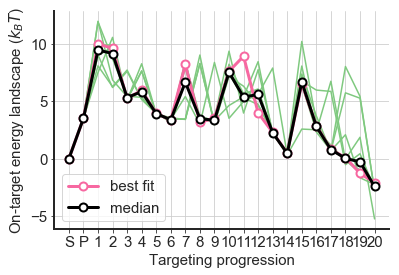

In [41]:
# --- make selection --- 
selected_sims_chi=np.array(simset3)[(np.array(chi_squared)<3000)]

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = process_SA_fits(selected_sims_chi,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]


# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in selected_sims_chi:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )

plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');


LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Load all simulations Cas12, this is needed for the following figures

In [42]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,11):
    sa = pd.read_csv('../Diewertje/Simulation results/24_5_2019_cas12_conc3/fit_24_5_2019_cas12_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/Simulation results/24_5_2019_cas12_conc3/fit_24_5_2019_cas12_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/Simulation results/24_5_2019_cas12_conc3/fit_24_5_2019_cas12_conc3_sim_1.txt'

In [43]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

model_id = 'general_energies_no_kPR'

# Figure 21a

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


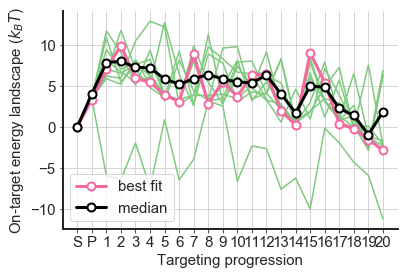

In [44]:
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Figure 19a + 19c

In [45]:
def select_on_prediction_WA(simset,
                            percentage=0.1,
                            Nparams=43,
                            model_id='general_energies_no_kPR',
                            path='../Data_Boyle/',
                            replica='1'):
    # in my case replica is filename!
    scores = []
    for sim in simset:
        #print sim
        parameters = getParm.load_simm_anneal(sim, Nparams)
        score, _, _ = predict_train(parameters, model_id=model_id, path=path, replica=replica, Plot=False)
        scores.append(score)
    scores = np.array(scores)
    simset = np.array(simset)
    selected_scores = scores[scores <= percentage]
    selected_sims = simset[scores <= percentage]
    return selected_sims, selected_scores, scores


import os
import numpy as np
import pandas as pd
import Boyle_data_processing as process
import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA


# BASED ON ABA AVARAGE DATA AND PREDICTED ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    #data['WA'] = wa
    #data['WA'] = data.apply(Weighted_average, axis=1)

    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction


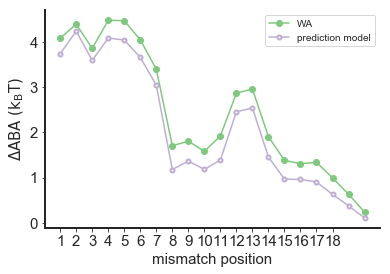

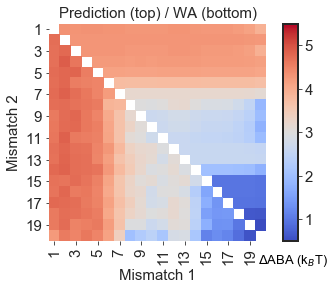

In [46]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

# plt.figure()
# _ = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


# plt.figure()
# best_heatmap = pltABA.predict_double_mm_delta(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                       mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)

    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='prediction model')

        sns.despine()
        plt.xticks(range(1, 19), fontsize=15);
        plt.yticks(fontsize=15);
        plt.xlabel('mismatch position', fontsize=15);
        plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

            plt.errorbar(x=single_mut_data_mean['Position'],
                         y=single_mut_data_mean['Delta ABA (kBT)'],
                         yerr=single_mut_data_mean['Uncertainty'],
                         marker='o',
                         markersize=4,
                         markerfacecolor='white',
                         markeredgewidth=2,
                         linestyle='solid',
                         label='data Finkelstein lab')
            plt.legend(fontsize=15, loc='best')
    return delta_ABA

def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_delta_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T,
                                                                                ontarget_ABA=ontarget_ABA)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'$\Delta$ABA (k$_B$T)',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        plt.grid()
        ax = plt.gca()
        #ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        #ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='ABA', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

percentage=0.1,
model_id='general_energies_no_kPR'
path=path_to_data
replica='cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'

WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']#-2.5545002878227865 
# substract ontarget to go to delta ABA

WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]

plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
_ = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plt.legend()

WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=False, vmin=0.5,vmax=5.5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)
plt.xlabel('Mismatch 1', fontsize=15)
plt.ylabel('Mismatch 2', fontsize=15)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);


# Figure 19b + 19d

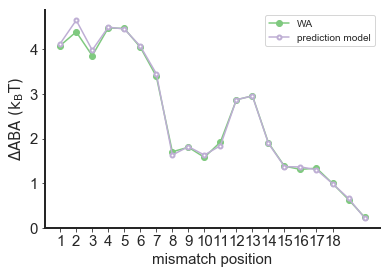

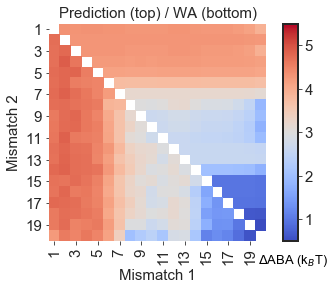

In [47]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

# plt.figure()
# _ = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


# plt.figure()
# best_heatmap = pltABA.predict_double_mm_delta(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    #concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                       mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)

    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='prediction model')

        sns.despine()
        plt.xticks(range(1, 19), fontsize=15);
        plt.yticks(fontsize=15);
        plt.xlabel('mismatch position', fontsize=15);
        plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

            plt.errorbar(x=single_mut_data_mean['Position'],
                         y=single_mut_data_mean['Delta ABA (kBT)'],
                         yerr=single_mut_data_mean['Uncertainty'],
                         marker='o',
                         markersize=4,
                         markerfacecolor='white',
                         markeredgewidth=2,
                         linestyle='solid',
                         label='data Finkelstein lab')
            plt.legend(fontsize=15, loc='best')
    return delta_ABA

def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_delta_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T,
                                                                                ontarget_ABA=ontarget_ABA)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'$\Delta$ABA (k$_B$T)',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        plt.grid()
        ax = plt.gca()
        #ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        #ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='ABA', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

percentage=0.1,
model_id='general_energies_no_kPR'
path=path_to_data
replica='cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'

WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']#-2.5545002878227865 
# substract ontarget to go to delta ABA

WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]

plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
_ = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plt.legend()

WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=False, vmin=0.5,vmax=5.5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)
plt.xlabel('Mismatch 1', fontsize=15)
plt.ylabel('Mismatch 2', fontsize=15)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);


# Load all simulations Cas12 (assumption equilibrium), this is needed for the following figures

In [48]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,17):
    sa = pd.read_csv('../Diewertje/Simulation results/26_5_2019_cas12_conc3_eq/fit_26_5_2019_cas12_conc3_eq_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/Simulation results/26_5_2019_cas12_conc3_eq/fit_26_5_2019_cas12_conc3_eq_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/Simulation results/26_5_2019_cas12_conc3_eq/fit_26_5_2019_cas12_conc3_eq_sim_5.txt'

In [49]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

# Figure 21b

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


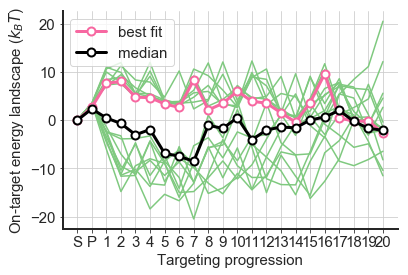

In [50]:
# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Figure 10 a,b,c (all separate data load)

ontarget ABA is: 2.602733089529497
[ 2.22268334e+00  1.68590037e+00  2.17535232e+00  2.24281982e+00
  2.10125579e+00  2.20265945e+00  2.11271174e+00  1.56577049e+00
  2.07871370e+00  1.52629757e+00  1.15969364e+00  6.82936138e-01
  5.19368595e-01  5.93687475e-01  4.58773434e-01  1.14702127e-05
  1.36498952e-05 -8.10940254e-05  4.01340525e-08 -8.75981578e-06]


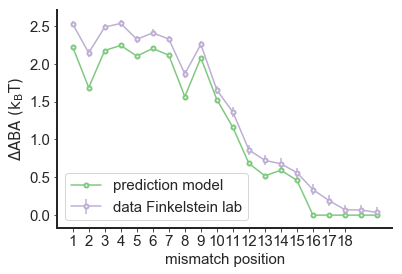

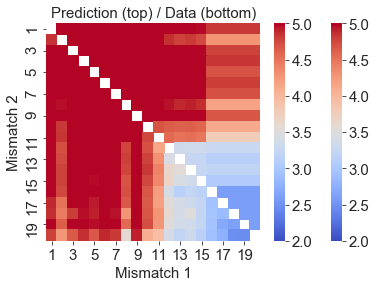

In [51]:
simset2 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,6):
    sa = pd.read_csv('../Diewertje/Simulation results/8_4_2019_conc2/fit_8_4_2019_conc2_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/Simulation results/8_4_2019_conc2/fit_8_4_2019_conc2_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset2.append(filename)
        
best_fit_conc2 = simset2[np.argmin(chi_squared)]

import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([10,100])
Param_conc2=getParm.load_simm_anneal(best_fit_conc2,Nparams)

# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'init_limit_general_energies_v2'

plt.figure()
_ = pltS.predict_single_mm(Param_conc2,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
plt.figure()
_ = pltABA.predict_double_mm(Param_conc2,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


ontarget ABA is: 2.800807744951609
[ 2.31786846e+00  1.46085055e+00  1.97764022e+00  2.01903704e+00
  1.88447301e+00  1.99722922e+00  1.93191614e+00  1.30289876e+00
  1.82268188e+00  1.23090575e+00  9.40820062e-01  5.30728397e-01
  5.29986417e-01  3.93182640e-01  3.16711445e-01 -1.98397352e-04
 -1.45810801e-04  6.67961882e-02  1.30021039e-04 -7.64376542e-05]


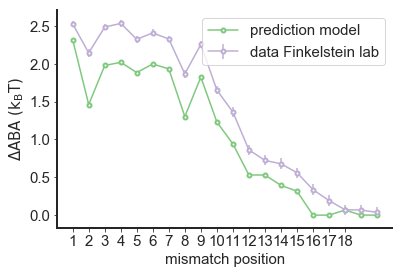

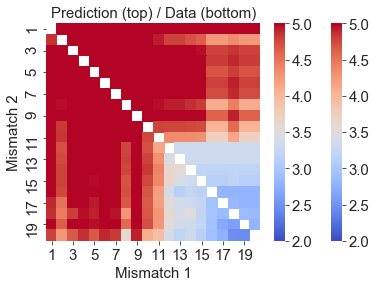

In [52]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,11):
    sa = pd.read_csv('../Diewertje/Simulation results/8_4_2019_conc3/fit_8_4_2019_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/Simulation results/8_4_2019_conc3/fit_8_4_2019_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'init_limit_general_energies_v2'

plt.figure()
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
plt.figure()
_ = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


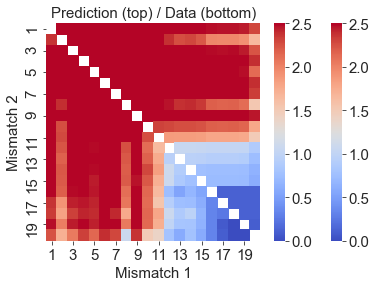

In [54]:
simset = []
no_good = []

chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,40):
    sa = pd.read_csv('../Diewertje/Simulation results/1_3_2019/fit_1_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/Simulation results/1_3_2019/fit_1_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    
best_fit = simset[np.argmin(chi_squared)]

# Load Parameters
model_id = 'init_limit_general_energies_v2'

# To find last line with the fitted parameters
f=open(best_fit)
lines=f.read().splitlines()
last_line=lines[-1]
last_line = last_line.split()
Finkel_params = list(map(float,last_line[:-2]))

# Load data
IlyaData = pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
IlyaData20 = pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv')

# To change epsilon PAM
Finkel_params_changed=Finkel_params
Finkel_params_changed[0]=3.5

# ONly moddel fit
T=60*10
guide_length=20

import plotting_Finkelsteinlab_Diewertje as pltF

def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   mismatch_positions=[],
                                   model_id=model_id,
                                   guide_length=20,
                                   T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_delta_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T,ontarget_ABA=ontarget_ABA)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0, vmax=2.5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=0, vmax=2.5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

plt.figure()
_ = predict_double_mm(Finkel_params,model_id,T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/double_mm_heatmap.pdf', format='pdf',bbox_inches='tight')


# The other figures in my thesis are made by other members of the group 